In [1]:
from datasets import load_dataset

dataset_full = load_dataset('mbpp')

In [38]:
print(dataset_full['test'])
print(len(dataset_full['test']))
code_list = [data['code'] for data in dataset_full['test']]

Dataset({
    features: ['task_id', 'text', 'code', 'test_list', 'test_setup_code', 'challenge_test_list'],
    num_rows: 500
})
500


In [39]:
print(len(code_list))
code_list[1]

500


'def sort_matrix(M):\r\n    result = sorted(M, key=sum)\r\n    return result'

In [35]:
import os, json

code_list = []
APPS_path = 'data/APPS/test/'
for filename in os.listdir(APPS_path):
    solutions_path = os.path.join(APPS_path, filename, 'solutions.json')
    if os.path.exists(solutions_path):    
        solutions = json.load(open(solutions_path, 'r'))
    code_list.append(solutions)

In [41]:
import sys
import os
root_path = '/Users/zhaoshengming/Code_RAG_Benchmark'
sys.path.insert(0, root_path)
from dataset_utils.match_oracle_docs import extract_func_name
from dataset_utils.dataset_configs import ConalaLoader


# loader = ConalaLoader()
# oracle_list = loader.load_oracle_list('test')
# code_list = [oracle['output'] for oracle in oracle_list]

has_func_count = 0
common_func_list = ['sum', 'replace', 'lower', 'search', 'sort', 'pow', 'append', 'sub', 'sqrt', 'split', 'add', 'keys', 'items', 'join', 'extend', 'copy', 'remove', 'index', 'pop']
for solutions in code_list:
#     func_list = []
#     for solution in solutions:
#         try:
#             func_list.extend(extract_func_name(solution))
#         except:
#             ...
#     func_list = list(set(func_list))
    func_list = extract_func_name(solutions)
    func_list = [x for x in func_list if x not in common_func_list]
    if len(func_list) > 0: 
        has_func_count += 1
        print(func_list)
        
print(has_func_count)
print(len(code_list))

['most_common']
['findall']
['defaultdict', 'heappop', 'heapify', 'heappush']
['heappop', 'heapify', 'heappush']
['from_iterable']
['count']
['values']
['count']
['ChainMap']
['Counter']
['capitalize']
['merge']
['intersection']
['strip']
['isalpha']
['phase']
['floor']
['compile']
['setdefault']
['reverse']
['findall']
['isdigit', 'isalpha']
['compile']
['heapify', 'heapreplace']
['compile']
['gcd']
['nlargest']
['setdefault', 'fromkeys']
['floor']
['polar']
['findall']
['update']
['reverse']
['values']
['groups', 'match']
['isspace']
['findall']
['findall']
['isdigit', 'isalpha']
['count']
['heapify', 'heappop']
['count']
['format']
['isdigit']
['compile']
['heappop', 'heappush']
['capitalize']
['values']
['end', 'group', 'finditer', 'start']
['values']
['most_common']
['cos', 'radians', 'tan']
['nsmallest']
53
500


In [78]:
pandas_eval_file = '/Users/zhaoshengming/Code_RAG_Benchmark/data/pandas-numpy-eval/data/PandasEval.jsonl.gz'
numpy_eval_file = pandas_eval_file.replace('PandasEval', 'NumpyEval')

In [79]:
import gzip
import json

pandas_eval_data = list()
with gzip.open(pandas_eval_file, 'rt') as f:
    for line in f:
        pandas_eval_data.append(json.loads(line))

numpy_eval_data = list()
with gzip.open(numpy_eval_file, 'rt') as f:
    for line in f:
        numpy_eval_data.append(json.loads(line))

In [16]:
print(pandas_eval_data[0].keys())
print(pandas_eval_data[14]['prompt'] + pandas_eval_data[14]['canonical_solution'][0])
print(pandas_eval_data[14]['task_id'])
print(pandas_eval_data[14]['test'])

dict_keys(['task_id', 'prompt', 'entry_point', 'canonical_solution', 'test'])
import pandas as pd

def f(x):
    a = x['Value'].iat[2] - x['Value'].iat[1]
    b = x['Value'].iat[3] - x['Value'].iat[0]
    c = x['ID'].iat[2] + ' - ' + x['ID'].iat[1]
    d = x['ID'].iat[3] + ' - ' + x['ID'].iat[0]
    return pd.DataFrame({'Value': [a,b], 'ID':[c,d]})

def calculate_row_diff_groupwise(df):
    # I need to calculate the difference between two rows groupwise using pandas.
    # To calculate the sum I would use pandas.groupby('Group').sum(), but how do you calculate the difference between rows where the row ordering is important?
    # I think we need custom function with apply which return DataFrame for each group, for select by position is used iat:
    # Return the result
    return df.groupby('Group').apply(f).reset_index(level=1, drop=True).reset_index()
PandasEval/14


METADATA = {
    'author': 'msra-v-dazan',
    'dataset': 'test',
    'type': 'groupby_apply_reset_index'
}


def chec

In [68]:
code_list = list()
for data in pandas_eval_data:
    code_list.append([data['prompt'] + solution for solution in data['canonical_solution']])
for data in numpy_eval_data:
    code_list.append([data['prompt'] + solution for solution in data['canonical_solution']])

print(len(code_list))

has_func_count = 0
common_func_list = ['sum', 'replace', 'lower', 'search', 'sort', 'pow', 'append', 'sub', 'sqrt', 'split', 'add', 'keys', 'items', 'join', 'extend', 'copy', 'remove', 'index', 'pop']
for idx, solutions in enumerate(code_list):
    print(idx)
    func_list = list()
    for solution in solutions:
        try:
            func_list.extend(extract_func_name(solution))
        except:
            print(solution)
    func_list = list(set(func_list))
    func_list = [x for x in func_list if x not in common_func_list]
    if len(func_list) > 0: 
        has_func_count += 1
        print(func_list)
        
print(has_func_count)
print(len(code_list))

202
0
['dropna']
1
['nan']
2
['DataFrame']
3
['format', 'apply']
4
['DataFrame']
5
6
['select_dtypes', 'DataFrame', 'astype']
7
['to_datetime', 'DataFrame']
8
['iloc', 'DataFrame']
9
['iloc']
10
['loc', 'apply', 'groupby', 'DataFrame', 'max']
11
['isin']
12
['count', 'columns', 'shape']
13
['DataFrame']
14
['apply', 'iat', 'groupby', 'reset_index', 'DataFrame']
15
['any', 'isnull']
16
17
['drop_duplicates']
18
['iloc']
19
['import pandas as pd\ndef creating_df_with_same_as_other(df_original):\n    # creating a new dataframe of all same with df_original one, but no any rows\n    # return the new dataframe\n        df_copy = df_original.iloc[:0,:].copy()\n    return df_copy']
import pandas as pd
def creating_df_with_same_as_other(df_original):
    # creating a new dataframe of all same with df_original one, but no any rows
    # return the new dataframe
        df_copy = df_original.iloc[:0,:].copy()
    return df_copy
20
['DataFrame', 'isnull']
21
['apply', 'DataFrame', 'mean', 'dropna'

In [6]:
import ast

code_string = "return df.groupby('Group').apply(f).reset_index(level=1, drop=True).reset_index()"
for node in ast.walk(ast.parse(code_string)):
    print(node.)

AttributeError: 'Module' object has no attribute 'keys'

In [70]:
# code_string = 'data.columns = map(str.lower, data.columns)'
prompt = data["prompt"]
gold_output = data['canonical_solution'][0]
print(prompt+gold_output)
tree = ast.parse(prompt+gold_output)
def print_ast(node, indent=0):
    print(' ' * indent + f"{type(node).__name__}: {node.__dict__}")
    for child_node in ast.iter_child_nodes(node):
        print_ast(child_node, indent=indent + 2)
print_ast(tree)

import pandas as pd

def make_df_all_cols_lower(data):
    # I want to make all column headers in my pandas data frame lower case
    # Return the changed dataframe
    data.columns = map(str.lower, data.columns)
    return data
Module: {'body': [<_ast.Import object at 0x14f08aaf0>, <_ast.FunctionDef object at 0x14f32c2e0>], 'type_ignores': []}
  Import: {'names': [<_ast.alias object at 0x14f0a54f0>], 'lineno': 1, 'col_offset': 0, 'end_lineno': 1, 'end_col_offset': 19}
    alias: {'name': 'pandas', 'asname': 'pd'}
  FunctionDef: {'name': 'make_df_all_cols_lower', 'args': <_ast.arguments object at 0x14f32c160>, 'body': [<_ast.Assign object at 0x14f32c5e0>, <_ast.Return object at 0x14f32c460>], 'decorator_list': [], 'returns': None, 'type_comment': None, 'lineno': 3, 'col_offset': 0, 'end_lineno': 7, 'end_col_offset': 15}
    arguments: {'posonlyargs': [], 'args': [<_ast.arg object at 0x14f32c1c0>], 'vararg': None, 'kwonlyargs': [], 'kw_defaults': [], 'kwarg': None, 'defaults': []}
     

In [83]:
from dataset_utils.match_oracle_docs import extract_func_name
data = pandas_eval_data[0]
prompt = data["prompt"]
gold_output = data['canonical_solution'][0]
print(prompt+gold_output)
names = extract_func_name(prompt+gold_output)

import pandas as pd
import numpy as np

def drop_rows_col_nan(df, col_name):
    # How to drop rows of Pandas DataFrame whose value in a certain column is NaN
    return df.dropna(subset=[col_name])


In [38]:
import string
import inspect

module = string
module_attributes = dir(module)
print(module_attributes)

['Formatter', 'Template', '_ChainMap', '_TemplateMetaclass', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_re', '_sentinel_dict', '_string', 'ascii_letters', 'ascii_lowercase', 'ascii_uppercase', 'capwords', 'digits', 'hexdigits', 'octdigits', 'printable', 'punctuation', 'whitespace']


In [55]:
inspect.ismodule(string.ascii_lowercase)

False

In [69]:
help(string.ascii_lowercase)

No Python documentation found for 'abcdefghijklmnopqrstuvwxyz'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [68]:
import pandas
# iloc is a attribute, but it aligns with a _iLocIndexer, and 
print(dir(pandas.core.indexing))
callable(pandas.core.indexing._iLocIndexer)

['ABCDataFrame', 'ABCSeries', 'AbstractMethodError', 'Any', 'CategoricalIndex', 'Hashable', 'Index', 'IndexSlice', 'IndexingError', 'IndexingMixin', 'IntervalIndex', 'InvalidIndexError', 'MultiIndex', 'NDFrameIndexerBase', 'Sequence', 'TYPE_CHECKING', '_AtIndexer', '_IndexSlice', '_LocIndexer', '_LocationIndexer', '_NS', '_ScalarAccessIndexer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_iAtIndexer', '_iLocIndexer', '_tuplify', 'algos', 'annotations', 'check_array_indexer', 'check_bool_indexer', 'com', 'concat_compat', 'convert_from_missing_indexer_tuple', 'convert_missing_indexer', 'convert_to_index_sliceable', 'doc', 'ensure_index', 'extract_array', 'infer_fill_value', 'is_array_like', 'is_bool_dtype', 'is_empty_indexer', 'is_exact_shape_match', 'is_hashable', 'is_integer', 'is_iterator', 'is_label_like', 'is_list_like', 'is_list_like_indexer', 'is_nested_tuple', 'is_numeric_dtype', 'is_object_dtype', 'is_scalar', 'is_se

True

In [78]:
# module = string
module = scipy.cluster.vq.kmeans
attrs = dir(module)
for attr in attrs:
    attr_obj = getattr(module, attr)
    if not inspect.ismodule(attr_obj) and not callable(attr_obj):
        print(attr)

__annotations__
__closure__
__code__
__defaults__
__dict__
__doc__
__globals__
__kwdefaults__
__module__
__name__
__qualname__


In [37]:
import string
import inspect

module = string
module_attributes = dir(module)
for attr_name in module_attributes:
    try:
        attr_obj = getattr(module, attr_name)
    except:
        continue
    if callable(attr_obj):
        print(attr_name)

Formatter
Template
_ChainMap
_TemplateMetaclass
capwords


In [36]:
func_list = list()
module_list = list()
def print_callable_attributes(module):
    if not module.__name__.startswith('scipy'): return
    if module in module_list: return
    module_list.append(module)
    
    for attr_name in dir(module):
        if attr_name.startswith('_'): continue
        try:
            attr_obj = getattr(module, attr_name)
        except:
            # print(module.__name__ + '.' + attr_name)
            continue
        # attr_obj = getattr(module, attr_name)
        if callable(attr_obj):
            full_name = module.__name__ + '.' + attr_name
            func_list.append(full_name)
            print(full_name)
        elif inspect.ismodule(attr_obj):
            print_callable_attributes(attr_obj)
            
import scipy
print_callable_attributes(scipy)
with open('data/python_docs/test.txt', 'w+') as f:
    for func in func_list:
        f.write(str(func) + '\n')

scipy.LowLevelCallable
scipy.cluster.hierarchy.ClusterNode
scipy.cluster.hierarchy.ClusterWarning
scipy.cluster.hierarchy.DisjointSet
scipy.cluster.hierarchy.average
scipy.cluster.hierarchy.centroid
scipy.cluster.hierarchy.complete
scipy.cluster.hierarchy.cophenet
scipy.cluster.hierarchy.correspond
scipy.cluster.hierarchy.cut_tree
scipy.cluster.hierarchy.dendrogram
scipy.cluster.hierarchy.deque
scipy.spatial.distance.CDistMetricWrapper
scipy.spatial.distance.CDistWeightedMetricWrapper
scipy.spatial.distance.Callable
scipy.spatial.distance.List
scipy.spatial.distance.MetricInfo
scipy.spatial.distance.Optional
scipy.spatial.distance.PDistMetricWrapper
scipy.spatial.distance.PDistWeightedMetricWrapper
scipy.spatial.distance.Set
scipy.spatial.distance.braycurtis
scipy.spatial.distance.canberra
scipy.spatial.distance.cdist
scipy.spatial.distance.chebyshev
scipy.spatial.distance.cityblock
scipy.spatial.distance.correlation
scipy.spatial.distance.cosine
scipy.spatial.distance.dice
scipy.spati

/var/folders/dz/p21syj115d38vhxclvc9800w0000gn/T/ipykernel_13427/306553293.py:11: DeprecationWarning: Please use `fft` from the `scipy.fftpack` namespace, the `scipy.fftpack.basic` namespace is deprecated.
  attr_obj = getattr(module, attr_name)
/var/folders/dz/p21syj115d38vhxclvc9800w0000gn/T/ipykernel_13427/306553293.py:11: DeprecationWarning: Please use `fft2` from the `scipy.fftpack` namespace, the `scipy.fftpack.basic` namespace is deprecated.
  attr_obj = getattr(module, attr_name)
/var/folders/dz/p21syj115d38vhxclvc9800w0000gn/T/ipykernel_13427/306553293.py:11: DeprecationWarning: Please use `fftn` from the `scipy.fftpack` namespace, the `scipy.fftpack.basic` namespace is deprecated.
  attr_obj = getattr(module, attr_name)
/var/folders/dz/p21syj115d38vhxclvc9800w0000gn/T/ipykernel_13427/306553293.py:11: DeprecationWarning: Please use `ifft` from the `scipy.fftpack` namespace, the `scipy.fftpack.basic` namespace is deprecated.
  attr_obj = getattr(module, attr_name)
/var/folders/

In [19]:
module_attributes = dir(scipy.cluster.vq)
print(module_attributes)

['ClusterError', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_asarray_validated', '_kmeans', '_kpoints', '_kpp', '_krandinit', '_missing_raise', '_missing_warn', '_valid_init_meth', '_valid_miss_meth', '_vq', 'cdist', 'check_random_state', 'deque', 'kmeans', 'kmeans2', 'np', 'py_vq', 'rng_integers', 'vq', 'warnings', 'whiten']


In [2]:
pandas_eval_file = '/Users/zhaoshengming/Code_RAG_Benchmark/data/pandas-numpy-eval/data/PandasEval.jsonl.gz'
numpy_eval_file = pandas_eval_file.replace('PandasEval', 'NumpyEval')

import gzip
import json

pandas_eval_data = list()
with gzip.open(pandas_eval_file, 'rt') as f:
    for line in f:
        pandas_eval_data.append(json.loads(line))

numpy_eval_data = list()
with gzip.open(numpy_eval_file, 'rt') as f:
    for line in f:
        numpy_eval_data.append(json.loads(line))

In [3]:
def remove_unbalanced_characters(text):
    stack = []

    for i, char in enumerate(text):
        if char == '[' or char == '(':
            stack.append((char, i))
        elif char == ']' or char == ')':
            if not stack:
                break
            opening, _ = stack.pop()
            if opening == '[' and char != ']':
                break
            elif opening == '(' and char != ')':
                break

    if stack:
        _, index = stack[0]
        text = text[index:]

    return text

In [4]:
def remove_unbalanced_characters(text):
    stack = []
    unbalanced_indexes = []
    special_char = ['+', '-', '*', '/', '<', '>', ';', '?', '%', '^']
    
    for i, char in enumerate(text):
        if char == '(' or char == '[':
            stack.append((char, i))
        elif char == ')' or char == ']':
            if not stack:
                unbalanced_indexes.append(i)
            else:
                opening, _ = stack.pop()
                if (opening == '[' and char != ']') or (opening == '(' and char != ')'):
                    unbalanced_indexes.append(i)

    # Add remaining opening brackets in the stack to unbalanced indexes
    for _, index in stack:
        unbalanced_indexes.append(index)
        
    for idx, char in enumerate(text):
        if char in special_char:
            unbalanced_indexes.append(idx)
        
    if unbalanced_indexes != []: text = text[max(unbalanced_indexes)+1:]

    return text

test_str = "for index, row in df.iterrows():"
remove_unbalanced_characters(test_str)

'for index, row in df.iterrows():'

In [1]:
test_str = "'    list_to_append = pd.DataFrame(list_to_append, columns=column_name_list)\n    df = df.append(list_to_append)\n    return df'"
print(test_str)
gold_func = 'append'
pattern = rf"\s[^\s]*?{gold_func}"
potential_full_names = re.findall(pattern, test_str)
print(potential_full_names)
full_name = remove_unbalanced_characters(full_name.replace(' ', ''))
print(full_name)

'    list_to_append = pd.DataFrame(list_to_append, columns=column_name_list)
    df = df.append(list_to_append)
    return df'


NameError: name 're' is not defined

In [38]:
from dataset_utils.match_oracle_docs import extract_func_name
import re, time

data = pandas_eval_data[6]

# for idx, data in enumerate(pandas_eval_data[70:75]):

prompt = data["prompt"]
gold_output = data['canonical_solution'][0]
print(gold_output)
# if idx == 0: gold_output = gold_output.replace('    ', '', 1)

gold_func_list = extract_func_name(prompt+gold_output)
print(gold_func_list)

func_list_full_name = list()
gold_output = ' ' + gold_output
for gold_func in gold_func_list:
    if gold_func not in gold_output: continue
    pattern = rf"\s[^\s]*?{gold_func}"
    try:
        potential_full_names = re.findall(pattern, gold_output)
        for full_name in potential_full_names:
            full_name = remove_unbalanced_characters(full_name.replace(' ', ''))
            func_list_full_name.append(full_name)
    except:
        pass


func_list_full_name = list(set(func_list_full_name))
print(func_list_full_name, end='\n\n\n')
gold_output = gold_output[1:]

 my_df.select_dtypes(include=['float64']).columns
my_df[cols] = my_df[cols].astype(np.float32)
['astype', 'select_dtypes', 'DataFrame']
['my_df[cols].astype', 'my_df.select_dtypes']




In [103]:
data = pandas_eval_data[4]
print(data['prompt'])
print([data['prompt']])
lines = data['prompt'].split('\n')



last_comment_index = max((i for i, line in enumerate(lines) if "#" in line), default=-1)
prompt_before_comment = "\n".join(lines[:last_comment_index])
prompt_after_comment = "\n".join(lines[last_comment_index + 1:])
# print(prompt_before_comment, end='\nafter comment\n')
# print(prompt_after_comment)

indent = 0
for char in lines[last_comment_index]:
    if char == " ":
        indent += 1
    else:
        break
indent = indent*' '

help_string = '\n'
for full_name in func_list_full_name:
    help_string = help_string + indent + f'help({full_name})' + '\n'
# print(help_string)

program = prompt_before_comment + help_string + prompt_after_comment + data['canonical_solution'][0]

split_string = data['test'].split('assert')
test_code = split_string[0]+'assert'+split_string[1]+'\n'
# if data['entry_point'] == 'none':
#     test_code += 'check()'
# else:
#     test_code += f'check({data["entry_point"]})'
test_code += 'check()' if data['entry_point'] == 'none' else f'check({data["entry_point"]})'
    
print(program+test_code)

import pandas as pd

def get_data_frame_from_list(list_of_lists):
    # list_of_lists format: [header, [row1], [row2], ...]
    # header format: [column1, column2, ...]
    # row format: [value1, value2, ...]
    # How to convert list to dataframe?
    # Return the dataframe

['import pandas as pd\n\ndef get_data_frame_from_list(list_of_lists):\n    # list_of_lists format: [header, [row1], [row2], ...]\n    # header format: [column1, column2, ...]\n    # row format: [value1, value2, ...]\n    # How to convert list to dataframe?\n    # Return the dataframe\n']
import pandas as pd

def get_data_frame_from_list(list_of_lists):
    # list_of_lists format: [header, [row1], [row2], ...]
    # header format: [column1, column2, ...]
    # row format: [value1, value2, ...]
    # How to convert list to dataframe?
    help(my_df[cols].astype)
    help(my_df.select_dtypes)
    return pd.DataFrame(list_of_lists[1:], columns=list_of_lists[0])

METADATA = {
    'author': 'msra-v-dazan',
    'dataset'

In [53]:
print(data['test'])
splited_code = data['test'].split('assert', 2)
test_code = splited_code[0]+'assert'+splited_code[1]+"\n"+f'check()'



METADATA = {
    'author': 'msra-v-dazan',
    'dataset': 'test',
    'type': 'astype'
}


def check():
    assert my_df.equals(pd.DataFrame({'col1': [1,2,3], 'col2': [np.float32(1.0),np.float32(2.0),np.float32(3.0)]}))





In [56]:
print([prompt])
prompt1, prompt2 = prompt.rsplit('\n', 1)
print([gold_output])
aug_code = prompt1 + f'\nhelp(my_df[cols].astype)\n' + f'help(my_df.select_dtypes)\n' + prompt2 + gold_output + '\n' + test_code
print(aug_code)

["import pandas as pd\nimport numpy as np\n\nmy_df = pd.DataFrame({'col1': [1,2,3], 'col2': [1.0,2.0,3.0]})\n# I need to change the dtype of multiple columns but the dataframe has different kind of dtypes. \n# Some columns dtypes are float64 whereas some columns are int64\n# I need to change all float64 to float32.\ncols ="]
[" my_df.select_dtypes(include=['float64']).columns\nmy_df[cols] = my_df[cols].astype(np.float32)"]
import pandas as pd
import numpy as np

my_df = pd.DataFrame({'col1': [1,2,3], 'col2': [1.0,2.0,3.0]})
# I need to change the dtype of multiple columns but the dataframe has different kind of dtypes. 
# Some columns dtypes are float64 whereas some columns are int64
# I need to change all float64 to float32.
help(my_df[cols].astype)
help(my_df.select_dtypes)
cols = my_df.select_dtypes(include=['float64']).columns
my_df[cols] = my_df[cols].astype(np.float32)


METADATA = {
    'author': 'msra-v-dazan',
    'dataset': 'test',
    'type': 'astype'
}


def check():
    as

In [ ]:
from dataset_utils.match_oracle_docs import match_oracle_doc



In [57]:

import sys
from io import StringIO

old_stdout = sys.stdout
new_stdout = StringIO()
sys.stdout = new_stdout

try:
    exec(aug_code)
    printed_output = new_stdout.getvalue()
finally:
    sys.stdout = old_stdout

print(printed_output)

Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t' = True, errors: 'str' = 'raise') -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : data type, or dict of column name -> data type
        Use a numpy.dtype or Python type to cast entire pandas object to
        the same type. Alternatively, use {col: dtype, ...}, where col is a
        column label and dtype is a numpy.dtype or Python type to cast one
        or more of the DataFrame's columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
        - ``raise`` : allow exceptions to be raised


In [105]:
import pandas as pd

def f(x):
    a = x['Value'].iat[2] - x['Value'].iat[1]
    b = x['Value'].iat[3] - x['Value'].iat[0]
    c = x['ID'].iat[2] + ' - ' + x['ID'].iat[1]
    d = x['ID'].iat[3] + ' - ' + x['ID'].iat[0]
    return pd.DataFrame({'Value': [a,b], 'ID':[c,d]})

def calculate_row_diff_groupwise(df):
    # I need to calculate the difference between two rows groupwise using pandas.
    # To calculate the sum I would use pandas.groupby('Group').sum(), but how do you calculate the difference between rows where the row ordering is important?
    # I think we need custom function with apply which return DataFrame for each group, for select by position is used iat:
    # Return the result
    try: help(.reset_index)
    except: pass
    print("split_sign")
    try: help(df.groupby('Group').apply)
    except: pass
    print("split_sign")
    try: help(df)
    except: pass
    print("split_sign")
    try: help(df.groupby('Group').apply(f).reset_index)
    except: pass
    print("split_sign")
    try: help(df.groupby)
    except: pass
    print("split_sign")
    return df.groupby('Group').apply(f).reset_index(level=1, drop=True).reset_index()


METADATA = {
    'author': 'msra-v-dazan',
    'dataset': 'test',
    'type': 'groupby_apply_reset_index'
}


def check(candidate):
    assert candidate(pd.DataFrame({'Group': ['M1', 'M1', 'M1', 'M1'], 'Value': [3, 3, 5, 4], 'ID': ['dki', 'two', 'three', 'msra']})).equals(pd.DataFrame({'Group': ['M1', 'M1'], 'Value': [2, 1], 'ID': ['three - two', 'msra - dki']}))
    
check(calculate_row_diff_groupwise)

SyntaxError: invalid syntax (4063082593.py, line 15)

In [85]:
def get_doc(api_sign):
    buffer = io.StringIO()
    sys.stdout = buffer

    try:
        help(api_sign)
        doc = buffer.getvalue()
        helped_api_sign, content = doc.split('\n\n',1)
        # use the same way in match oracle docs to identify api sign and verify if its same
        if 'built-in' in helped_api_sign:
            module = 'builtins'
        else:
            module = helped_api_sign.split('module ')[1].replace(':', '')
        method = api_sign.rsplit('.', 1)[1]
        helped_api_sign = module + '.' + method
        assert helped_api_sign == api_sign
    except:
        print(api_sign)
        content = None
    finally:
        sys.stdout = sys.__stdout__

    return content

In [ ]:
help(api_sign)

In [1]:
from dataset_utils.crawl_docs import get_doc

api_sign_file = 'data/python_docs/api_sign_third_party.txt'
with open(api_sign_file, 'r') as f:
    api_sign_list = [line.strip() for line in f.readlines()]
# api_sign = api_sign_list[0]
# module, func = api_sign.rsplit('.', 1)
# attr_obj = getattr(module, func)
# get_doc(api_sign)

tensorflow.AggregationMethod
tensorflow.AggregationMethod
Help on ufunc object:

ceil = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  **Calling ufuncs:** ``op(*x[, out], where=True, **kwargs)``
 |  
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray a

Help on ufunc object:

ceil = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  **Calling ufuncs:** ``op(*x[, out], where=True, **kwargs)``
 |  
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array object(s) in whi

Help on ufunc object:

ceil = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  **Calling ufuncs:** ``op(*x[, out], where=True, **kwargs)``
 |  
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array object(s) in whi

Help on partial object:

class partial(builtins.object)
 |  partial(func, *args, **keywords) - new function with partial application
 |  of the given arguments and keywords.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __setattr__(self, name, value, /)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(...)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descripto

dict_keys(['lib', 'test_type', 'test_case_cnt', 'perturbation_type', 'perturbation_origin_id', 'reference_code', 'test_code', 'code_context', 'test_generate_pickle', 'prompt', 'ans', 'source_url'])
Sklearn 35
Sklearn 36
import argparse
import pickle


parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default="1")
args = parser.parse_args()
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# X, y, X_test = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))
### BEGIN SOLUTION
W = W.unsqueeze(0).unsqueeze(0).expand(*data.size())
result = torch.sum(data * W, 2)
result = result.view(10, 2, 3)
### END SOLUTION
try:
    assert preprocess("asdfASDFASDFWEQRqwerASDFAqwerASDFASDF") == "ASDFASDFASDFWEQRQWERASDFAQWERASDFASDF"
    assert preprocess == tfidf.preprocessor
    with open('result/result_{}.pkl'.format(args.test_case), 'wb') as f:
        pickle.dump("accept", f)
except:
    with open('result/result_{

Pandas 4
Pandas 12
Pandas 63
Pandas 69
Pandas 70
Pandas 71
Pandas 72
Pandas 87
Pandas 93
Pandas 94
Pandas 102
Pandas 114
Pandas 120
Pandas 132
Pandas 183
Pandas 204
Pandas 222
Numpy 0
Numpy 1
Numpy 2
Numpy 3
Numpy 4
Numpy 5
Numpy 6
Numpy 7
Numpy 8
Numpy 9
Numpy 10
Numpy 11
Numpy 12
Numpy 13
Numpy 14
Numpy 15
Numpy 16
Numpy 17
Numpy 18
Numpy 19
Numpy 20
Numpy 21
Numpy 22
Numpy 23
Numpy 24
Numpy 25
Numpy 26
Numpy 27
Numpy 28
Numpy 29
Numpy 30
Numpy 31
Numpy 32
Numpy 33
Numpy 34
Numpy 35
Numpy 36
Numpy 37
Numpy 38
Numpy 39
Numpy 40
Numpy 41
Numpy 42
Numpy 43
Numpy 44
Numpy 45
Numpy 46
Numpy 47
Numpy 48
Numpy 49
Numpy 50
Numpy 51
Numpy 52
Numpy 53
Numpy 54
Numpy 55
Numpy 56
Numpy 57
Numpy 58
Numpy 59
Numpy 60
Numpy 61
Numpy 62
Numpy 63
Numpy 64
Numpy 65
Numpy 66
Numpy 67
Numpy 68
Numpy 69
Numpy 70
Numpy 71
Numpy 72
Numpy 73
Numpy 74
Numpy 75
Numpy 76
Numpy 77
Numpy 78
Numpy 79
Numpy 80
Numpy 81
Numpy 82
Numpy 83
Numpy 84
Numpy 85
Numpy 86
Numpy 87
Numpy 88
Numpy 89
Numpy 90
Numpy 91
Numpy 

Numpy 0
Numpy 1
Numpy 2
Numpy 3
Numpy 4
Numpy 5
Numpy 6
Numpy 7
Numpy 8
Numpy 9
Numpy 10
Numpy 11
Numpy 12
Numpy 13
Numpy 14
Numpy 15
Numpy 16
Numpy 17
Numpy 18
Numpy 19
Numpy 20
Numpy 21
Numpy 22
Numpy 23
Numpy 24
Numpy 25
Numpy 26
Numpy 27
Numpy 28
Numpy 29
Numpy 30
Numpy 31
Numpy 32
Numpy 33
Numpy 34
Numpy 35
Numpy 36
Numpy 37
Numpy 38
Numpy 39
Numpy 40
Numpy 41
Numpy 42
Numpy 43
Numpy 44
Numpy 45
Numpy 46
Numpy 47
Numpy 48
Numpy 49
Numpy 50
Numpy 51
Numpy 52
Numpy 53
Numpy 54
Numpy 55
Numpy 56
Numpy 57
Numpy 58
Numpy 59
Numpy 60
Numpy 61
Numpy 62
Numpy 63
Numpy 64
Numpy 65
Numpy 66
Numpy 67
Numpy 68
Numpy 69
Numpy 70
Numpy 71
Numpy 72
Numpy 73
Numpy 74
Numpy 75
Numpy 76
Numpy 77
Numpy 78
Numpy 79
Numpy 80
Numpy 81
Numpy 82
Numpy 83
Numpy 84
Numpy 85
Numpy 86
Numpy 87
Numpy 88
Numpy 89
Numpy 90
Numpy 91
Numpy 92
Numpy 93
Numpy 94
Numpy 95
Numpy 96
Numpy 97
Numpy 98
Numpy 99
Numpy 100
Numpy 101
Numpy 102
Numpy 103
Numpy 104
Numpy 105
Numpy 106
Numpy 107
Numpy 108
Numpy 109
Numpy 110


import argparse
import pickle


parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default="1")
args = parser.parse_args()
import numpy as np
import pandas as pd
import torch

a = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))
chunk_dim=10
### BEGIN SOLUTION
W = W.unsqueeze(0).unsqueeze(0).expand(*data.size())
result = torch.sum(data * W, 2)
result = result.view(10, 2, 3)
### END SOLUTION
with open('result/result_{}.pkl'.format(args.test_case), 'wb') as f:
    pickle.dump(tensors_31, f)

Pandas 0
Pandas 1
Pandas 2
Pandas 3
Pandas 4
Pandas 5
Pandas 6
Pandas 7
Pandas 8
Pandas 9
Pandas 10
Pandas 11
Pandas 12
Pandas 13
Pandas 14
Pandas 15
Pandas 16
Pandas 17
Pandas 18
Pandas 19
Pandas 20
Pandas 21
Pandas 22
Pandas 23
Pandas 24
Pandas 25
Pandas 26
Pandas 27
Pandas 28
Pandas 29
Pandas 30
Pandas 31
Pandas 32
Pandas 33
Pandas 34
Pandas 35
Pandas 36
Pandas 37
Pandas 38
Pandas 39
Pandas 40
Pandas 41
Pandas 42
Pandas 43
Pandas 44
Pandas 45
Pandas 46
Panda

dict_keys(['lib', 'test_type', 'test_case_cnt', 'perturbation_type', 'perturbation_origin_id', 'reference_code', 'test_code', 'code_context', 'test_generate_pickle', 'prompt', 'ans', 'source_url'])
import argparse
import pickle


parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default="1")
args = parser.parse_args()
import numpy as np
import pandas as pd
import torch

a = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))
chunk_dim=10
### BEGIN SOLUTION
W = W.unsqueeze(0).unsqueeze(0).expand(*data.size())
result = torch.sum(data * W, 2)
result = result.view(10, 2, 3)
### END SOLUTION
with open('result/result_{}.pkl'.format(args.test_case), 'wb') as f:
    pickle.dump(tensors_31, f)


import pickle
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default=1)
args = parser.parse_args()

import numpy as np
from scipy.optimize import fsolve
def eqn(x, a, b):
    return x + 2*a - b**2

xdata, bdata = pic


import pickle
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default=1)
args = parser.parse_args()
from scipy import stats
import pandas as pd
import numpy as np
LETTERS = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
df = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))
[insert]
#print(df)


with open('result/result_{}.pkl'.format(args.test_case), 'wb') as f:
    pickle.dump(df, f)

import pickle


import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default=1)
args = parser.parse_args()
import numpy as np

min, max, n = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))

[insert]
#print(result)


with open('result/result_{}.pkl'.format(args.test_case), 'wb') as file:
    pickle.dump(result, file)

Numpy 22
Numpy 39
Numpy 41
Numpy 51
Numpy 74
Numpy 79
Numpy 81
Numpy 106
Numpy 139
Numpy 156
Numpy 174
Numpy 179
Numpy 207
Scipy 12
Scipy 18
Scipy 28
Scipy 31
Scipy 34
Scipy 35
Scipy 36
S

import pickle

import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default=1)
args = parser.parse_args()
import tensorflow as tf

x = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))
###BEGIN SOLUTION
[insert]
[insert_help]
###END SOLUTION
result = x

with open('result/result_{}.pkl'.format(args.test_case), 'wb') as f:
    pickle.dump(result, f)

Matplotlib 0
Matplotlib 1
Matplotlib 2
Matplotlib 3
Matplotlib 4
Matplotlib 5
Matplotlib 6
Matplotlib 7
Matplotlib 8
Matplotlib 9
Matplotlib 10
Matplotlib 11
Matplotlib 12
Matplotlib 13
Matplotlib 14
Matplotlib 15
Matplotlib 16
Matplotlib 17
Matplotlib 18
Matplotlib 19
Matplotlib 20
Matplotlib 21
Matplotlib 22
Matplotlib 23
Matplotlib 24
Matplotlib 25
Matplotlib 26
Matplotlib 27
Matplotlib 28
Matplotlib 29
Matplotlib 30
Matplotlib 31
Matplotlib 32
Matplotlib 33
Matplotlib 34
Matplotlib 35
Matplotlib 36
Matplotlib 37
Matplotlib 38
Matplotlib 39
Matplotlib 40
Matplotlib 41
Matplotlib 42
Mat

dict_keys(['lib', 'test_type', 'test_case_cnt', 'perturbation_type', 'perturbation_origin_id', 'reference_code', 'test_code', 'code_context', 'test_generate_pickle', 'prompt', 'ans', 'source_url'])
58
58
44
31
9
21
23
13
58
44
31
9
21
23
13
58
44
31
9
21
23
13
58
44
31
9
21
23
13
dict_keys(['lib', 'test_type', 'test_case_cnt', 'perturbation_type', 'perturbation_origin_id', 'reference_code', 'test_code', 'code_context', 'test_generate_pickle', 'prompt', 'ans', 'source_url'])
dict_keys(['lib', 'test_type', 'test_case_cnt', 'perturbation_type', 'perturbation_origin_id', 'reference_code', 'test_code', 'code_context', 'test_generate_pickle', 'prompt', 'ans', 'source_url'])
Problem:
I have the following DataFrame:
    Col1  Col2  Col3  Type
0      1     2     3     1
1      4     5     6     1
2      7     8     9     2
3    10    11    12     2
4    13    14    15     3
5    16    17    18     3


The DataFrame is read from a CSV file. All rows which have Type 1 are on top, followed by the 

In [19]:
from tensorflow import python as tf_python

print('help begin')
print(help(tf_python.platform.tf_logging.tf_export))

In [26]:
api_sign_file = 'data/python_docs/api_sign_third_party.txt'
api_doc_file = 'data/python_docs/api_doc_third_party.json'

import json

with open(api_sign_file, 'r') as f:
    existing_func_list = [line.strip() for line in f.readlines()]
with open(api_doc_file, 'r') as f:
    existing_api_doc_dict = json.load(f)

In [27]:
print(len(existing_func_list))
print(len(existing_api_doc_dict.items()))

In [29]:
import scipy
from dataset_utils.crawl_docs import crawl_callable_attributes, get_doc

func_list = []
module_list = []
api_doc_dict = dict()
crawl_callable_attributes(scipy, 'scipy')

NameError: name 'module_list' is not defined

In [35]:
def postprocess(lib, generated_code: str):
    if lib == "Matplotlib":
        code_lines = generated_code.split("\n")
        postprocessed_lines = []
        for line in code_lines:
            skip_line_flag = False
            # Matplotlib removes function calls that will clear the global figure object
            # Removing these functions helps running execution-based evaluation
            for phrase in ["plt.show()", "plt.clf()", "plt.close()", "savefig"]:
                if phrase in line:
                    skip_line_flag = True
                    break

            if skip_line_flag:
                continue
            else:
                postprocessed_lines.append(line)
        generated_code = "\n".join(postprocessed_lines)
    return generated_code

In [4]:
from data.DS1000.ds1000 import DS1000Dataset
import sys

sys.stdout = sys.__stdout__

ds1000 = DS1000Dataset(source_dir='data/DS1000/ds1000_data', libs='all', mode='Completion')

ValueError: invalid literal for int() with base 10: '.DS_Store'

In [113]:
print(ds1000['Pandas'][0].keys())
print(ds1000['Pandas'][0]['prompt'])
print(ds1000['Pandas'][0]['code_context'])

In [98]:
# data = ds1000['Pandas'][0]

for lib in ds1000.libs:
    for idx, data in enumerate(ds1000[lib]):
        gold_output = data['reference_code']
        prompt = data['code_context']
        
        lines = prompt.split('\n')
#         insert_idx = [i for i, line in enumerate(lines) if "[insert]" in line]
#         assert len(insert_idx) == 1
#         insert_indent = 0
#         for char in lines[insert_idx]:
#             if char == " ":
#                 insert_indent += 1
#             else:
#                 break
#         insert_indent = insert_indent * ' '
        
#         aug_prompt = ''
#         for idx, line in enumerate(lines):
#             aug_prompt = aug_prompt + line + '\n'
#             if idx == insert_indent:
#                 aug_prompt = aug_prompt + insert_indent + '[insert_help]' + '\n'
#                 break
                
#         aug_prompt = 
        if lib == 'Matplotlib':
            with_open_idx = [i for i, line in enumerate(lines) if "plt.savefig" in line]
        else:
            with_open_idx = [i for i, line in enumerate(lines) if "with open" in line]
        if len(with_open_idx) != 1:
            print(lib, idx)

In [104]:
"""
Sklearn 35
Sklearn 36
Sklearn 113
Matplotlib 0-154
"""


data = ds1000['Sklearn'][35]

gold_output = data['reference_code']
prompt = data['code_context']
print(gold_output)

lines = prompt.split('\n')
insert_idx = [i for i, line in enumerate(lines) if "[insert]" in line]
assert len(insert_idx) == 1
insert_idx = insert_idx[0]

insert_indent = 0
for char in lines[insert_idx]:
    if char == " ":
        insert_indent += 1
    else:
        break
insert_indent = insert_indent * ' '

aug_prompt = ''
for idx, line in enumerate(lines):
    aug_prompt = aug_prompt + line + '\n'
    if idx == insert_idx:
        aug_prompt = aug_prompt + insert_indent + '[insert_help]' + '\n'

print(aug_prompt)

# remove save file 

In [110]:
# sample ds1000 data and write into files
import data.DS1000.ds1000
import random

random.seed(0)

ds1000 = DS1000Dataset(source_dir='data/DS1000/ds1000_data', libs='all', mode='Completion')

sampled_idx_dict = dict()
sampled_data_list = list() 
for lib in ds1000.libs:
    num_sampled = int(len(ds1000[lib]) * 0.2)
    problem_id_list = list(range(0, len(ds1000[lib])))
    sampled_idx = random.sample(problem_id_list, num_sampled)
    sampled_idx_dict[lib] = sampled_idx
    print(len(sampled_idx))
    for idx in sampled_idx:
        sampled_data = ds1000[lib][idx]
        sampled_data_list.append(dict(qs_id=f'{lib}_{idx}', 
                                      reference_code=sampled_data['reference_code'], 
                                      code_context=sampled_data['code_context'],
                                      prompt=sampled_data['prompt']))
        
with open('data/DS1000/sampled_data.json', 'w+') as f:
    json.dump(sampled_data_list, f, indent=2)

In [20]:
from dataset_utils.match_oracle_docs import augment_with_prefix, extract_func_name
from data.DS1000.ds1000 import DS1000Dataset
ds1000 = DS1000Dataset(source_dir='data/DS1000/ds1000_data', libs='all', mode='Completion')


data = ds1000['Sklearn'][0]

gold_output = data['reference_code']
code_snippet = data['code_context']
lib = 'Sklearn'
problem_idx = 0
print(gold_output)

gold_func_list = extract_func_name(code_snippet.replace("[insert]", gold_output))

# covert to the format of help()
# todo: this func is not robust
func_list_full_name = augment_with_prefix(gold_output, gold_func_list)
print(func_list_full_name)

data1 = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])
['pd.DataFrame', 'np.c_']


In [21]:
from dataset_utils.match_oracle_docs import get_indent

# gene augmented gold_output
output_lines = gold_output.split('\n')
aug_gold_outputs = list()
current_gold_output = ''
for line in output_lines:
    line_indent = get_indent(line)
    for full_name in func_list_full_name:
        if full_name in line:
            aug_gold_outputs.append(current_gold_output + line_indent + f'try: help({full_name})\n' + line_indent + 'except: print("SIGN")\n')
    current_gold_output = current_gold_output + line + '\n'
    for idx, aug_gold_output in enumerate(aug_gold_outputs):
        aug_gold_outputs[idx] = aug_gold_outputs[idx] + line + '\n'
print(aug_gold_outputs)

['try: help(pd.DataFrame)\nexcept: print("SIGN")\ndata1 = pd.DataFrame(data=np.c_[data[\'data\'], data[\'target\']], columns=data[\'feature_names\'] + [\'target\'])\n', 'try: help(np.c_)\nexcept: print("SIGN")\ndata1 = pd.DataFrame(data=np.c_[data[\'data\'], data[\'target\']], columns=data[\'feature_names\'] + [\'target\'])\n']


In [29]:
program = code_snippet.replace('[insert]', aug_gold_outputs[0])
print([program])

['import argparse\nimport pickle\n\n\nparser = argparse.ArgumentParser()\nparser.add_argument("--test_case", type=int, default="1")\nargs = parser.parse_args()\nimport pandas as pd\nimport numpy as np\nfrom sklearn.datasets import load_iris\n\ndata = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))\n### BEGIN SOLUTION\ntry: help(pd.DataFrame)\nexcept: print("SIGN")\ndata1 = pd.DataFrame(data=np.c_[data[\'data\'], data[\'target\']], columns=data[\'feature_names\'] + [\'target\'])\n\n### END SOLUTION\nwith open(\'result/result_{}.pkl\'.format(args.test_case), \'wb\') as f:\n    pickle.dump(data1, f)\n']


In [52]:
program = 'import argparse\nimport pickle\n\n\nparser = argparse.ArgumentParser()\nparser.add_argument("--test_case", type=int, default="1")\nargs = parser.parse_args()\nimport pandas as pd\nimport numpy as np\nfrom sklearn.datasets import load_iris\nprint("xxx")\n\ndata = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))\n### BEGIN SOLUTION\ntry: help(pd.DataFrame)\nexcept: print("SIGN")\n### END SOLUTION\n'
print(program)

import argparse
import pickle


parser = argparse.ArgumentParser()
parser.add_argument("--test_case", type=int, default="1")
args = parser.parse_args()
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
print("xxx")

data = pickle.load(open(f"input/input{args.test_case}.pkl", "rb"))
### BEGIN SOLUTION
try: help(pd.DataFrame)
except: print("SIGN")
### END SOLUTION



In [25]:
print(lib)
print(f'q{problem_idx}')

Sklearn
q0


In [59]:
import tempfile
from pathlib import Path
import shutil
import subprocess
import os, sys
from io import StringIO

problem_path = os.path.join('/Users/zhaoshengming/Code_RAG_Benchmark/data/DS1000/ds1000_data', f'{lib}/Completion/q{problem_idx}')
# get current dir because we will enter a temp dir to execute generated code
os.chdir(problem_path)
# cwd = os.getcwd()
# # we create a tempdir to execute each generated program
# with tempfile.TemporaryDirectory() as tempdir_name:
#     # clean everything in the tempdir (unlikely)
#     for file_name in os.listdir(tempdir_name):
#         os.remove(file_name)

#     tempdir_name = Path(tempdir_name)
#     # copy all files and data dependencies from
#     for file_name in os.listdir(problem_path):
#         if os.path.isfile(os.path.join(problem_path, file_name)):
#             shutil.copy(os.path.join(problem_path, file_name), os.path.join(tempdir_name,file_name))
#         elif os.path.isdir(os.path.join(problem_path, file_name)):
#             shutil.copytree(
#                 os.path.join(problem_path, file_name), os.path.join(tempdir_name, file_name)
#             )
#         else:
#             raise ValueError("impossible.")

#     # generated outputs will be put into `result`
#     if os.path.exists(os.path.join(tempdir_name, "result")):
#         shutil.rmtree(os.path.join(tempdir_name, "result"))
#     os.mkdir(os.path.join(tempdir_name, "result"))

#     with open(os.path.join(tempdir_name, "program.py"), "w", encoding="UTF-8") as f:
#         f.write(program)

# # enter into the tempdir to execute
# os.chdir(tempdir_name)

# print(pickle.load(open(f"input/input1.pkl", "rb")))

exec(program, {})

#     cmd = f"python program.py --test_case 1"
#     # exec
#     time_limit = 60  # should not change the official time_limit
#     process = subprocess.Popen(
#         cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE
#     )
#     stdout_data, stderr_data = process.communicate()

#     old_stdout = sys.stdout
#     new_stdout = StringIO()
#     sys.stdout = new_stdout
#     try:
#         exec(program, {})
#     except:
#         print('???')
#     finally:
#         printed_output = new_stdout.getvalue()
#         os.chdir(cwd)
#         sys.stdout = old_stdout
    
# print(printed_output)

usage: ipykernel_launcher.py [-h] [--test_case TEST_CASE]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/zhaoshengming/Library/Jupyter/runtime/kernel-2bfdb19c-e05b-4b78-b8a4-abb68b8df519.json


SystemExit: 2

In [60]:
file = '/Users/zhaoshengming/Downloads/hotpot_dev_distractor_v1.json'

import json

dataset = json.load(open(file, 'r'))

In [61]:
print(dataset[0].keys())

dict_keys(['_id', 'answer', 'question', 'supporting_facts', 'context', 'type', 'level'])


In [70]:
print(dataset[0]['type'])

comparison


In [162]:
data_file = '/Users/zhaoshengming/Code_RAG_Benchmark/data/conala/unittest_docprompting_conala.json'
dataset = list(json.load(open(data_file, 'r')).values())
data = dataset[71]

gold_output = data['canonical_solution']
# gold_output = "x.rsplit('-', maxsplit=1)"
code_snippet = data['prompt']
program = f"{code_snippet}{gold_output}{data['suffix']}"
test_func = f"\n{data['test']}\ncheck({data['entry_point']})"
print(program)
print(test_func)

def f_35420052(plt, mappable, ax3):
	plt.colorbar(mappable=mappable, cax=ax3)
	return plt


import numpy as np
import matplotlib.pyplot as plt
from obspy.core.trace import Trace
from obspy.imaging.spectrogram import spectrogram

def check(candidate):
    spl1 = Trace(data=np.arange(0, 10))
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
    ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
    ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

    #make time vector
    t = np.arange(spl1.stats.npts) / spl1.stats.sampling_rate

    #plot waveform (top subfigure)    
    ax1.plot(t, spl1.data, 'k')

    #plot spectrogram (bottom subfigure)
    spl2 = spl1
    fig = spl2.spectrogram(show=False, axes=ax2, wlen=10)
    mappable = ax2.images[0]
    candidate(plt, mappable, ax3)
    
    im=ax2.images
    assert im[-1].colorbar is not None

check(f_35420052)


In [149]:
a_list = [1, '1']
assert set(list(set(a_list))) == set(['1', 1])

In [127]:
str1 = "hello-world"
str1 = str1.rsplit('-', maxsplit=1)
assert str1 == ['hello', 'world'] 

In [169]:
program1, program2 = program.split('\n', 1)
help_string = '\n\t' + f'try: help({full_name})\n' + '\t' + 'except: pass\n'
print(program1 + help_string + program2 + test_func)

def f_35420052(plt, mappable, ax3):
	try: help(np.c_)
	except: pass
	plt.colorbar(mappable=mappable, cax=ax3)
	return plt

import numpy as np
import matplotlib.pyplot as plt
from obspy.core.trace import Trace
from obspy.imaging.spectrogram import spectrogram

def check(candidate):
    spl1 = Trace(data=np.arange(0, 10))
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
    ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
    ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

    #make time vector
    t = np.arange(spl1.stats.npts) / spl1.stats.sampling_rate

    #plot waveform (top subfigure)    
    ax1.plot(t, spl1.data, 'k')

    #plot spectrogram (bottom subfigure)
    spl2 = spl1
    fig = spl2.spectrogram(show=False, axes=ax2, wlen=10)
    mappable = ax2.images[0]
    candidate(plt, mappable, ax3)
    
    im=ax2.images
    assert im[-1].colorbar is not None

check(f_35420052)


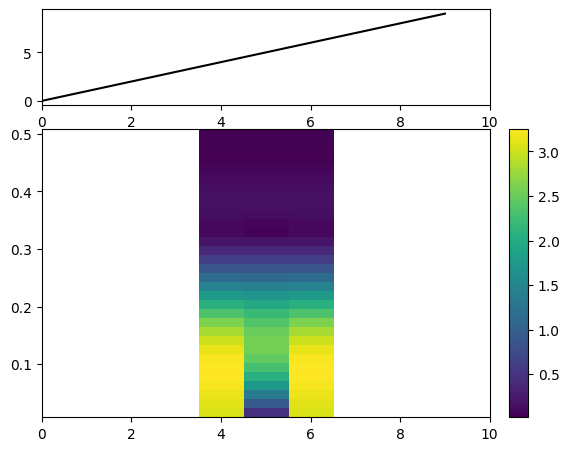

In [167]:
def f_35420052(plt, mappable, ax3):
	plt.colorbar(mappable=mappable, cax=ax3)
	return plt


import numpy as np
import matplotlib.pyplot as plt
from obspy.core.trace import Trace
from obspy.imaging.spectrogram import spectrogram

def check(candidate):
    spl1 = Trace(data=np.arange(0, 10))
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
    ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
    ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

    #make time vector
    t = np.arange(spl1.stats.npts) / spl1.stats.sampling_rate

    #plot waveform (top subfigure)    
    ax1.plot(t, spl1.data, 'k')

    #plot spectrogram (bottom subfigure)
    spl2 = spl1
    fig = spl2.spectrogram(show=False, axes=ax2, wlen=10)
    mappable = ax2.images[0]
    candidate(plt, mappable, ax3)
    
    im=ax2.images
    assert im[-1].colorbar is not None

check(f_35420052)

In [165]:
! pip install obspy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 8.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:0000:0100:01
  Created wheel for obspy: filename=obspy-1.4.0-cp38-cp38-macosx_13_0_arm64.whl size=14062239 sha256=8cabf0d630b414efecf9f45724fa323e91c4af4c67301b6b74136d2e97db7709
  Stored in directory: /Users/zhaoshengming/Library/Caches/pip/wheels/a6/97/38/3adcdfa085b730de17f50a5eef753b8ab87bfc9725c66163dc
Successfully built obspy
  Attempting uninstall: typing-extensions
    Found existing ins

In [176]:
import pkgutil
import inspect
import pandas

for module_info in pkgutil.iter_modules(path=pandas.__path__):
#     attr = get_attr(pandas, module_info.name)
#     if inspect.ismodule(attr):
#         submodule
    print(module_info.name, module_info.ispkg)

_config True
_libs True
_testing True
_typing False
_version False
api True
arrays True
compat True
conftest False
core True
errors True
io True
plotting True
testing False
tests True
tseries True
util True


In [187]:
def crawl_callable_attributes(module, library_name):
    if not module.__name__.startswith(library_name): return  # filter module not belong to this lib
    if module in module_list: return    # filter already traversed module
    module_list.append(module)

    for module_info in pkgutil.iter_modules(path=module.__path__):
        attr_name = module_info.name
        if module.__name__ == 'matplotlib' and attr_name != 'pyplot':
            continue
        full_name = module.__name__ + '.' + attr_name
        print(full_name)
        # filter some default modules
        if attr_name in ['setup', 'tests']: continue
        # to deal with lazy import, actively import the submodule
        if module_info.ispkg:
            submodule = importlib.import_module(full_name)
            crawl_callable_attributes(submodule, library_name)
        else:
            # get attr object
            try:
                attr_obj = getattr(module, attr_name)
            except:
                print('error on: ', full_name)
                continue
            if callable(attr_obj):
                print(full_name)
                if attr_name.startswith('_'): continue
                if full_name not in func_list:
                    func_list.append(full_name)
                    # doc = get_doc(attr_obj, full_name)
                    # if doc: api_doc_dict[full_name] = doc

In [188]:
import matplotlib
module_list = []
crawl_callable_attributes(matplotlib, 'matplotlib')

matplotlib.pyplot


In [190]:
for module_info in pkgutil.iter_modules(path=matplotlib.__path__):
    attr_name = module_info.name
    if attr_name == 'pyplot':
        break

In [195]:
import importlib
importlib.import_module('matplotlib.pyplot')

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [197]:
dir(matplotlib.pyplot)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_docstring',
 '_draw_all_if_interactive',
 '_get_backend_mod',
 '_get_pyplot_commands

In [199]:
import pandas as pd

df = pd.DataFrame()
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset=None, inplace: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If a

In [206]:
from pandas.core.frame import DataFrame

In [208]:
dir(pandas.core.frame)

['AggFuncType',
 'Any',
 'AnyArrayLike',
 'AnyStr',
 'Appender',
 'ArrayLike',
 'ArrayManager',
 'Axes',
 'Axis',
 'BaseInfo',
 'BlockManager',
 'CachedAccessor',
 'Callable',
 'CategoricalIndex',
 'ColspaceArgType',
 'CompressionOptions',
 'DataFrame',
 'DataFrameInfo',
 'DatetimeArray',
 'DatetimeIndex',
 'Dtype',
 'ExtensionArray',
 'ExtensionDtype',
 'FilePathOrBuffer',
 'FillnaOptions',
 'FloatFormatType',
 'FormattersType',
 'FrameOrSeriesUnion',
 'Frequency',
 'Hashable',
 'IO',
 'Index',
 'IndexKeyFunc',
 'IndexLabel',
 'Iterable',
 'Iterator',
 'Level',
 'MultiIndex',
 'NDFrame',
 'NpDtype',
 'OpsMixin',
 'PeriodIndex',
 'PythonFuncType',
 'Renamer',
 'Scalar',
 'Sequence',
 'Series',
 'SparseFrameAccessor',
 'StorageOptions',
 'StringIO',
 'Substitution',
 'Suffixes',
 'TYPE_CHECKING',
 'TimedeltaArray',
 'ValueKeyFunc',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_from_nested_dict',
 '_merge_doc',
 '_num

In [209]:
importlib.import_module("pandas.core.frame.DataFrame")

ModuleNotFoundError: No module named 'pandas.core.frame.DataFrame'; 'pandas.core.frame' is not a package

In [204]:
pandas.core.__path__

['/opt/homebrew/lib/python3.8/site-packages/pandas/core']

In [223]:
def load_api_docs():
    api_doc_third_party_file = 'data/python_docs/api_doc_third_party_new.json'
    api_doc_builtin_file = 'data/python_docs/api_doc_builtin_new.json'
    python_docs_third = json.load(open(api_doc_third_party_file, 'r'))
    python_docs_builtins = json.load(open(api_doc_builtin_file, 'r'))
    python_docs_third.update(python_docs_builtins)

    _python_docs_third = dict()
    for key, value in python_docs_third.items():
#         if key.startswith('pandas._testing'):
#             continue
        _python_docs_third[key] = value

    return _python_docs_third



def process_python_docs():
    python_docs = load_api_docs()
    # print(len(python_docs.items()))
    _python_docs = dict()
    for key, value in python_docs.items():
        if value not in python_docs:
            _python_docs[value] = [key]
        else:
            _python_docs[value].append(key)
    # print(len(_python_docs.items()))

    return _python_docs

In [217]:
ds1000_oracle_file = 'data/DS1000/oracle_docs_matched_new.json'

processed_python_docs = process_python_docs()
oracle_list = json.load(open(ds1000_oracle_file, 'r'))
oracle = oracle_list[0]

In [230]:
oracle_doc = oracle['oracle_docs'][0]
lines = oracle_doc.split('\n')
oracle_doc_main = ''
for line in lines[3:]:
    oracle_doc_main += line

In [231]:
python_docs = load_api_docs()
python_doc = python_docs['pandas._testing.SubclassedDataFrame.apply']

In [232]:
for doc_id, doc in python_docs.items():
    lines = doc.split('\n')
    doc_main = ''
    for line in lines[3:]:
        doc_main += line
    if doc_main == oracle_doc_main:
        print(doc_id)

pandas.core.frame.DataFrame.apply
pandas._testing.SubclassedDataFrame.apply


In [227]:
assert doc_main == python_doc_main

In [233]:
import csv

wikidata_file = 'data/wikipedia/psgs_w100.tsv'

row_count = 0
with open(wikidata_file, 'r', newline='') as tsvfile:
    for _ in tsvfile:
        row_count += 1
print(row_count)

21015325


In [320]:
row_count = 0
data_list = list()
with open(wikidata_file, 'r', newline='') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        row_count += 1
        if row_count == 1: continue
        processed_data = dict(_index=es_idx, doc_key=row[2] + '_' + row[0], doc=row[1])
        data_list.append(processed_data)
        if row_count == 100:
            break

print(len(data_list))

99


In [325]:
data_list[0]

{'_index': 'hotpotqa',
 'doc_key': 'Aaron_1',
 'doc': 'Aaron Aaron ( or ; "Ahärôn") is a prophet, high priest, and the brother of Moses in the Abrahamic religions. Knowledge of Aaron, along with his brother Moses, comes exclusively from religious texts, such as the Bible and Quran. The Hebrew Bible relates that, unlike Moses, who grew up in the Egyptian royal court, Aaron and his elder sister Miriam remained with their kinsmen in the eastern border-land of Egypt (Goshen). When Moses first confronted the Egyptian king about the Israelites, Aaron served as his brother\'s spokesman ("prophet") to the Pharaoh. Part of the Law (Torah) that Moses received from'}

In [240]:
hotpotqa_file = 'data/hotpotQA/hotpot_dev_distractor_v1.json'
qs_list = json.load(open(hotpotqa_file, 'r'))

In [327]:
def steam_wiki_data():
    wiki_corpus_file = 'data/wikipedia/psgs_w100.tsv'
    with open(wiki_corpus_file, 'r', newline='') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        for row in reader:
            processed_data = dict(_index=es_idx, doc_key=row[2] + '_' + row[0], doc=row[1])
            yield processed_data

In [330]:
es.count(index=es_idx)['count']

21015325

In [328]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk, streaming_bulk

es = Elasticsearch("http://localhost:9200")
es_idx = 'hotpotqa'
print(es.info().body)

{'name': '59115a1fb88b', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'lafhX4qhSiilJeZZfB3EGQ', 'version': {'number': '8.7.0', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '09520b59b6bc1057340b55750186466ea715e30e', 'build_date': '2023-03-27T16:31:09.816451435Z', 'build_snapshot': False, 'lucene_version': '9.5.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'}


In [329]:
es.indices.delete(index=es_idx, ignore=[400, 404])
es.indices.create(index=es_idx)
stream = steam_wiki_data()
for ok, res in streaming_bulk(es, actions=stream, index=es_idx):
    if not ok:
        print(res)

/var/folders/dz/p21syj115d38vhxclvc9800w0000gn/T/ipykernel_35573/1895681318.py:1: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.delete(index=es_idx, ignore=[400, 404])
